In [1]:
import pandas as pd 
import spacy

In [13]:
phab_path = "/mmfs1/gscratch/comdata/users/mjilg/mw-repo-lifecycles/case1/0312_resolved_ve_phab_comments.csv"
phab_df = pd.read_csv(phab_path)

In [14]:
#find gerrit phab PHID: PHID-USER-idceizaw6elwiwm5xshb
phab_df['isGerrit'] = phab_df['AuthorPHID'] == 'PHID-USER-idceizaw6elwiwm5xshb'
#cleaning df
phab_df['id'] = phab_df.index + 1
#may have to build out the reply_to column 
phab_df['reply_to'] = phab_df.groupby('TaskPHID')['id'].shift()
phab_df['reply_to'] = phab_df['reply_to'].where(pd.notnull(phab_df['reply_to']), None)

phab_df = phab_df.rename(columns={
    'AuthorPHID': 'speaker',
    'TaskPHID': 'conversation_id',
    'WMFaffil':'meta.affil',
    'isGerrit': 'meta.gerrit'
})

# after 11-1-2012 before 11-1-2013
phab_df['timestamp'] = pd.to_datetime(phab_df['date_created'], unit='s', origin='unix', utc=True)
filtered_phab_df = phab_df[(phab_df['date_created'] < 1383264000) & (phab_df['date_created'] > 1351728000)]

#removing headless conversations
task_phab_df = filtered_phab_df[filtered_phab_df['comment_type']=="task_description"]
headed_task_phids = task_phab_df['conversation_id'].unique()
filtered_phab_df = filtered_phab_df[filtered_phab_df['conversation_id'].isin(headed_task_phids)]

#removing gerrit comments 
comment_phab_df = filtered_phab_df[filtered_phab_df['meta.gerrit'] != True]

In [15]:
unique_conversation_ids = len(comment_phab_df['conversation_id'].unique())
unique_ids = len(comment_phab_df['id'].unique())
unique_speakers = len(comment_phab_df['speaker'].unique())

print(f"Unique conversation_ids: {unique_conversation_ids}")
print(f"Unique ids: {unique_ids}")
print(f"Unique speakers: {unique_speakers}")

Unique conversation_ids: 2081
Unique ids: 8804
Unique speakers: 230


In [16]:
comment_phab_df

task_title  \
708    VisualEditor: [Regression] "More" menu gets sh...   
709    VisualEditor: [Regression] "More" menu gets sh...   
712    VisualEditor: [Regression] "More" menu gets sh...   
717    VisualEditor: [Regression] "More" menu gets sh...   
718    VisualEditor: [Regression] "More" menu gets sh...   
...                                                  ...   
32172  Setup wikibugs and gerrit-wm for #mediawiki-vi...   
32178  Setup wikibugs and gerrit-wm for #mediawiki-vi...   
32179  Setup wikibugs and gerrit-wm for #mediawiki-vi...   
32180  VisualEditor: Two replacements within the same...   
32181  VisualEditor: Two replacements within the same...   

                                            comment_text  date_created  \
708    Tested on both the Italian and the English Wik...    1380976920   
709    Note that this is fixed and has been deployed ...    1381281033   
712    *** Bug 55362 has been marked as a duplicate o...    1381267451   
717    (In reply to comment #6)\n> Krinkle, do I need...    1381168024   
718    Krinkle, do I need to file a different bug for...    1381142922   
...                                                  ...           ...   
32172  Puppet config for wikibugs:\n\nhttps://gerrit....    1354738560   
32178  gerrit-wm is done, but wikibugs is "an almight...    1360206228   
32179  Attempted fixes in Gerrit 37566 and Gerrit 37570.    1354926921   
32180  Test case:\n\n+                       'removin...    1353134520   
32181  With bug 45061 all change marker code has been...    1360975473   

                              speaker  meta.affil  \
708    PHID-USER-wil4b5lylrvf3krixlkl        True   
709    PHID-USER-ydswvwhh5pm4lshahjje        True   
712    PHID-USER-ydswvwhh5pm4lshahjje        True   
717    PHID-USER-sai77mtxmpqnm6pycyvz        True   
718    PHID-USER-wil4b5lylrvf3krixlkl        True   
...                               ...         ...   
32172  PHID-USER-ydswvwhh5pm4lshahjje        True   
32178  PHID-USER-ydswvwhh5pm4lshahjje        True   
32179  PHID-USER-ydswvwhh5pm4lshahjje        True   
32180  PHID-USER-fovtl67ew4l4cc3oeypc       False   
32181  PHID-USER-it53o2f2kyryqyj33uzt       False   

                      conversation_id      comment_type    status  \
708    PHID-TASK-64s56xzrc22ustp2z7wx  task_description  resolved   
709    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
712    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
717    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
718    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
...                               ...               ...       ...   
32172  PHID-TASK-ciosa56mnibqn4lx27ub  task_description  resolved   
32178  PHID-TASK-ciosa56mnibqn4lx27ub   task_subcomment       NaN   
32179  PHID-TASK-ciosa56mnibqn4lx27ub   task_subcomment       NaN   
32180  PHID-TASK-guukovmsjsnlpphgujcv  task_description   invalid   
32181  PHID-TASK-guukovmsjsnlpphgujcv   task_subcomment       NaN   

                                                    text  \
708    Tested on both the Italian and the English Wik...   
709    Note that this is fixed and has been deployed ...   
712    *** Bug 55362 has been marked as a duplicate o...   
717    (In reply to comment #6)\n> Krinkle, do I need...   
718    Krinkle, do I need to file a different bug for...   
...                                                  ...   
32172  Puppet config for wikibugs:\n\nhttps://gerrit....   
32178  gerrit-wm is done, but wikibugs is "an almight...   
32179  Attempted fixes in Gerrit 37566 and Gerrit 37570.   
32180  Test case:\n\n+                       'removin...   
32181  With bug 45061 all change marker code has been...   

                                           resolved_text  meta.gerrit     id  \
708    Tested on both the Italian and the English Wik...        False    709   
709    Note that this is fixed and has been deployed ...        False    710   
712    **

In [17]:
import re

def preprocess_text(text):
    text = str(text)
    text = text.replace('*', ' ')
    text = text.replace('-', ' ')
    text = re.sub(r'http\S+', '', text)
    return text

In [18]:
comment_phab_df['processed_text'] = comment_phab_df['text'].apply(preprocess_text)

/tmp/ipykernel_49967/3649688126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_phab_df['processed_text'] = comment_phab_df['text'].apply(preprocess_text)


In [19]:
comment_phab_df['processed_resolved_text'] = comment_phab_df['resolved_text'].apply(preprocess_text)

/tmp/ipykernel_49967/1316816771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_phab_df['processed_resolved_text'] = comment_phab_df['resolved_text'].apply(preprocess_text)


In [20]:
nlp = spacy.load("en_core_web_sm")

def extract_dependency_tree(sentence):
    doc = nlp(sentence)
    return [(token.text, token.lemma_, token.dep_, token.head.text, token.ancestors, token.subtree, token.children) for token in doc]

In [21]:
comment_phab_df['dependency_tree'] = comment_phab_df['processed_text'].apply(extract_dependency_tree)

/tmp/ipykernel_49967/2805711855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_phab_df['dependency_tree'] = comment_phab_df['processed_text'].apply(extract_dependency_tree)


In [22]:
comment_phab_df['resolved_dependency_tree'] = comment_phab_df['processed_resolved_text'].apply(extract_dependency_tree)

/tmp/ipykernel_49967/2117289791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_phab_df['resolved_dependency_tree'] = comment_phab_df['processed_resolved_text'].apply(extract_dependency_tree)


In [32]:
#get VAD scores
import numpy as np
#https://saifmohammad.com/WebPages/nrc-vad.html
column_headings = ['Word', 'Valence', 'Arousal', 'Domination']
vad_lexicon = pd.read_csv('NRC-VAD-Lexicon.txt', delimiter='\t', header=None, names=column_headings)
vad_dict = vad_lexicon.set_index('Word').T.to_dict()

def vad_scoring(dependency_tree):
    valence = []
    arousal = []
    dominance = []
    for token, lemma, dep, head, ancestors, subtree, children in dependency_tree:
        if lemma in vad_dict:
            valence.append(vad_dict[lemma]['Valence'])
            arousal.append(vad_dict[lemma]['Arousal'])
            dominance.append(vad_dict[lemma]['Domination'])

    # Compute average scores across the comment
    avg_valence = np.mean(valence) if valence else 0
    avg_arousal = np.mean(arousal) if arousal else 0
    avg_dominance = np.mean(dominance) if dominance else 0

    return [avg_valence, avg_arousal, avg_dominance]

def dominance_prevail(dependency_tree):
    dominant_words = 0 
    for token, lemma, dep, head, ancestors, subtree, children in dependency_tree:
        if lemma in vad_dict:
            if vad_dict[lemma]['Domination'] >= 0.75:
                dominant_words += 1
    return dominant_words
    

In [33]:
#establishing per-comment VAD scores 
comment_phab_df['avg_vad_scores'] = comment_phab_df['dependency_tree'].apply(vad_scoring)
comment_phab_df['dominant_wc'] = comment_phab_df['dependency_tree'].apply(dominance_prevail)

In [34]:
comment_phab_df[['average_v_score', 'average_a_score', 'average_d_score']] = pd.DataFrame(comment_phab_df['avg_vad_scores'].tolist(), index=comment_phab_df.index)
comment_phab_df = comment_phab_df.drop(columns=['avg_vad_scores'])
comment_phab_df

task_title  \
708    VisualEditor: [Regression] "More" menu gets sh...   
709    VisualEditor: [Regression] "More" menu gets sh...   
712    VisualEditor: [Regression] "More" menu gets sh...   
717    VisualEditor: [Regression] "More" menu gets sh...   
718    VisualEditor: [Regression] "More" menu gets sh...   
...                                                  ...   
32172  Setup wikibugs and gerrit-wm for #mediawiki-vi...   
32178  Setup wikibugs and gerrit-wm for #mediawiki-vi...   
32179  Setup wikibugs and gerrit-wm for #mediawiki-vi...   
32180  VisualEditor: Two replacements within the same...   
32181  VisualEditor: Two replacements within the same...   

                                            comment_text  date_created  \
708    Tested on both the Italian and the English Wik...    1380976920   
709    Note that this is fixed and has been deployed ...    1381281033   
712    *** Bug 55362 has been marked as a duplicate o...    1381267451   
717    (In reply to comment #6)\n> Krinkle, do I need...    1381168024   
718    Krinkle, do I need to file a different bug for...    1381142922   
...                                                  ...           ...   
32172  Puppet config for wikibugs:\n\nhttps://gerrit....    1354738560   
32178  gerrit-wm is done, but wikibugs is "an almight...    1360206228   
32179  Attempted fixes in Gerrit 37566 and Gerrit 37570.    1354926921   
32180  Test case:\n\n+                       'removin...    1353134520   
32181  With bug 45061 all change marker code has been...    1360975473   

                              speaker  meta.affil  \
708    PHID-USER-wil4b5lylrvf3krixlkl        True   
709    PHID-USER-ydswvwhh5pm4lshahjje        True   
712    PHID-USER-ydswvwhh5pm4lshahjje        True   
717    PHID-USER-sai77mtxmpqnm6pycyvz        True   
718    PHID-USER-wil4b5lylrvf3krixlkl        True   
...                               ...         ...   
32172  PHID-USER-ydswvwhh5pm4lshahjje        True   
32178  PHID-USER-ydswvwhh5pm4lshahjje        True   
32179  PHID-USER-ydswvwhh5pm4lshahjje        True   
32180  PHID-USER-fovtl67ew4l4cc3oeypc       False   
32181  PHID-USER-it53o2f2kyryqyj33uzt       False   

                      conversation_id      comment_type    status  \
708    PHID-TASK-64s56xzrc22ustp2z7wx  task_description  resolved   
709    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
712    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
717    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
718    PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
...                               ...               ...       ...   
32172  PHID-TASK-ciosa56mnibqn4lx27ub  task_description  resolved   
32178  PHID-TASK-ciosa56mnibqn4lx27ub   task_subcomment       NaN   
32179  PHID-TASK-ciosa56mnibqn4lx27ub   task_subcomment       NaN   
32180  PHID-TASK-guukovmsjsnlpphgujcv  task_description   invalid   
32181  PHID-TASK-guukovmsjsnlpphgujcv   task_subcomment       NaN   

                                                    text  \
708    Tested on both the Italian and the English Wik...   
709    Note that this is fixed and has been deployed ...   
712    *** Bug 55362 has been marked as a duplicate o...   
717    (In reply to comment #6)\n> Krinkle, do I need...   
718    Krinkle, do I need to file a different bug for...   
...                                                  ...   
32172  Puppet config for wikibugs:\n\nhttps://gerrit....   
32178  gerrit-wm is done, but wikibugs is "an almight...   
32179  Attempted fixes in Gerrit 37566 and Gerrit 37570.   
32180  Test case:\n\n+                       'removin...   
32181  With bug 45061 all change marker code has been...   

                                           resolved_text  ...  first_comment  \
708    Tested on both the Italian and the English Wik...  ...          False   
709    Note that this is fixed and has been deployed ...  ...          False   
712    **

In [35]:
# expand the dependency parser 
dependency_relations = []
resolved_dependency_relations = []

for index, row in comment_phab_df.iterrows():
    text = row['text']
    timestamp = row['timestamp']
    comment_id = row['id']
    conversation_id = row['conversation_id']
    WMFaffil = row['meta.affil']
    
    for token, lemma, dep, head, ancestors, subtree, children in row['dependency_tree']:
        if re.search(r'\b(visualeditor|VE|ve|VisualEditor)\b', token, re.IGNORECASE):
            dependency_relations.append({
                'comment_id': comment_id,
                'timestamp': timestamp,
                'wmfAffil':WMFaffil,
                'token': token,
                'dependency': dep,
                'head': head,
                'depth': len(list(ancestors)), 
                'children': len(list(children)) 
            })
    for token, lemma, dep, head, ancestors, subtree, children in row['resolved_dependency_tree']:
        if re.search(r'\b(visualeditor|VE|ve|VisualEditor)\b', token, re.IGNORECASE):
            resolved_dependency_relations.append({
                'comment_id': comment_id,
                'timestamp': timestamp,
                'wmfAffil':WMFaffil,
                'token': token,
                'dependency': dep,
                'head': head,
                'depth': len(list(ancestors)), 
                'children': len(list(children)) 
            })

resolved_dependency_relations_df = pd.DataFrame(resolved_dependency_relations)            
dependency_relations_df = pd.DataFrame(dependency_relations)

In [36]:
#now analysis/plotting 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

/tmp/ipykernel_49967/3248547585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_phab_df['first_comment'] = task_phab_df.groupby('speaker')['timestamp'].rank(method='first') == 1
/tmp/ipykernel_49967/3248547585.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  task_phab_df['week'] = task_phab_df['timestamp'].dt.to_period('W').dt.start_time


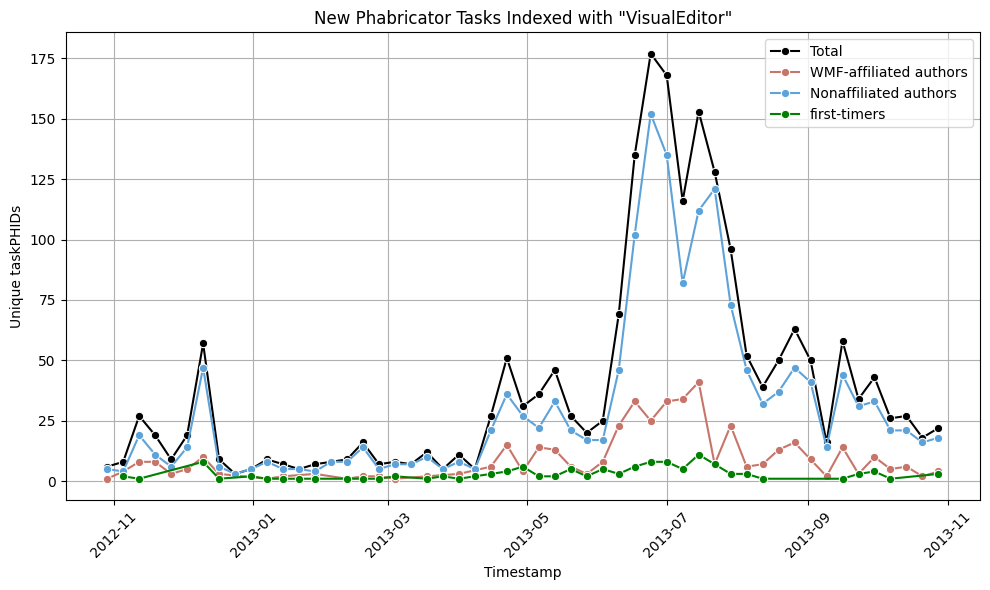

In [60]:
plt.figure(figsize=(10, 6))
task_phab_df = phab_df[phab_df['comment_type']=="task_description"]
task_phab_df['first_comment'] = task_phab_df.groupby('speaker')['timestamp'].rank(method='first') == 1
task_phab_df = task_phab_df[(task_phab_df['date_created'] < 1383264000) & (task_phab_df['date_created'] > 1351728000)]

task_phab_df['week'] = task_phab_df['timestamp'].dt.to_period('W').dt.start_time
unique_taskPHIDs = task_phab_df.groupby('week')['conversation_id'].nunique()

wmf_task_phab_df = task_phab_df[task_phab_df['meta.affil'] == True]
wmf_tasks = wmf_task_phab_df.groupby('week')['conversation_id'].nunique()

other_task_phab_df = task_phab_df[task_phab_df['meta.affil'] != True]
other_tasks = other_task_phab_df.groupby('week')['conversation_id'].nunique()

new_tasks_phab_df = task_phab_df[task_phab_df['first_comment'] == True]
new_tasks = new_tasks_phab_df.groupby('week')['conversation_id'].nunique()

sns.lineplot(x=unique_taskPHIDs.index, y=unique_taskPHIDs.values, color='black', label='Total', marker='o')
sns.lineplot(x=wmf_tasks.index, y=wmf_tasks.values, color='#c7756a', label='WMF-affiliated authors', marker='o')
sns.lineplot(x=other_tasks.index, y=other_tasks.values, color='#5da2d8', label='Nonaffiliated authors', marker='o')
sns.lineplot(x=new_tasks.index, y=new_tasks.values, color="green", label="first-timers", marker='o')

plt.title('New Phabricator Tasks Indexed with "VisualEditor"')
plt.xlabel('Timestamp')
plt.ylabel('Unique taskPHIDs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

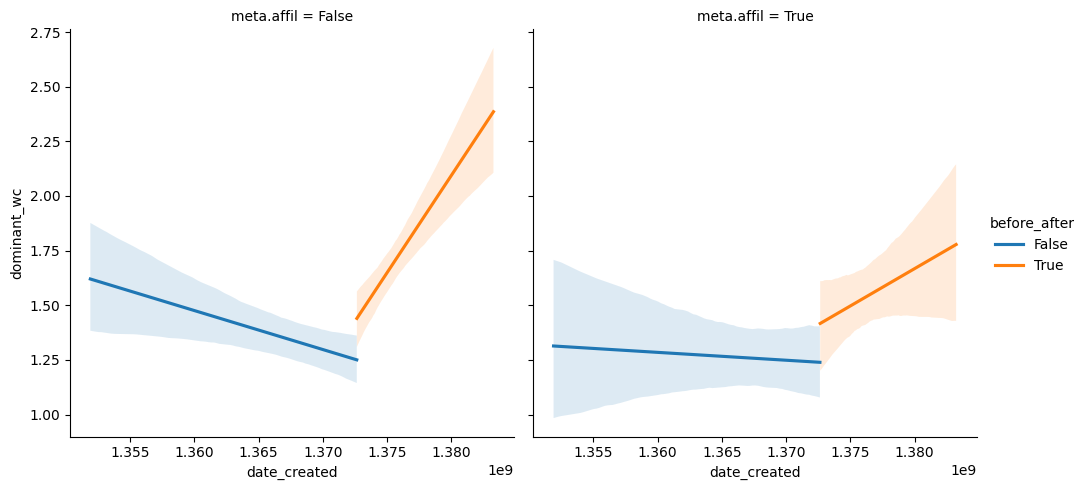

In [50]:
comment_phab_df['before_after'] = comment_phab_df['timestamp'] > pd.Timestamp('2013-07-01 00:00:01+00:00')
plt.figure(figsize=(10, 6))

sns.lmplot(data=comment_phab_df, x="date_created", y="dominant_wc", hue="before_after", col="meta.affil", scatter=False)

plt.show()

/tmp/ipykernel_49967/3455565877.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_dependencies = dependency_relations_df[dependency_relations_df['token'].str.contains(pattern, regex=True)]
/tmp/ipykernel_49967/3455565877.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  resolved_filtered_dependencies = resolved_dependency_relations_df[resolved_dependency_relations_df['token'].str.contains(pattern, regex=True)]
/tmp/ipykernel_49967/3455565877.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_49967/3455565877.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

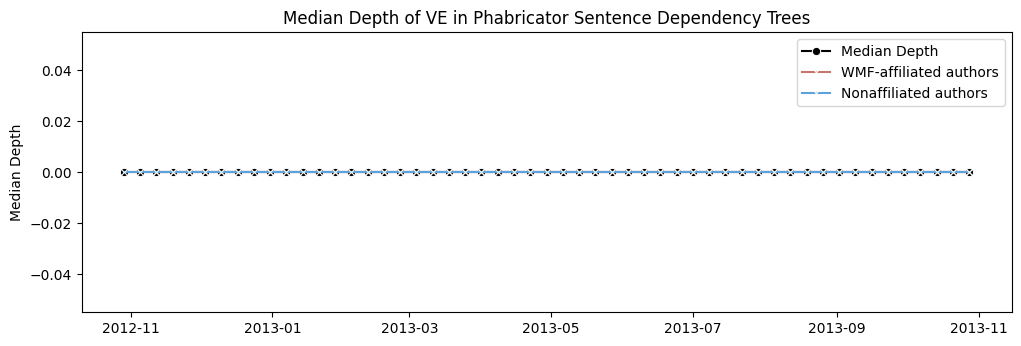

In [53]:
pattern = r'\b(ve|VE|visualeditor|VisualEditor)\b'
filtered_dependencies = dependency_relations_df[dependency_relations_df['token'].str.contains(pattern, regex=True)]
resolved_filtered_dependencies = resolved_dependency_relations_df[resolved_dependency_relations_df['token'].str.contains(pattern, regex=True)]

plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[6, 6])

# Main plot: Token depth by timestamp
'''
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=filtered_dependencies, x='timestamp', y='dependency', hue='wmfAffil', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('VE Depth by Timestamp w/o URLS')
ax0.set_xlabel('')
ax0.set_ylabel('Dependency Type')
ax0.legend().set_visible(False)
'''
# Calculate the median depth over time
filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
median_depth = filtered_dependencies.groupby('week')['depth'].median().reset_index()

wmf_filtered_dependencies = filtered_dependencies[filtered_dependencies['wmfAffil'] == True]
wmf_median_depth = wmf_filtered_dependencies.groupby('week')['depth'].median().reset_index()

other_filtered_dependencies = filtered_dependencies[filtered_dependencies['wmfAffil'] != True]
other_median_depth = other_filtered_dependencies.groupby('week')['depth'].median().reset_index()

# Plot the median depth over time
ax0 = plt.subplot(gs[0])
sns.lineplot(data=median_depth, x='week', y='depth', ax=ax0, color='black', label='Median Depth', marker='o')
sns.lineplot(data=wmf_median_depth, x='week', y='depth', ax=ax0, color='#c7756a', label='WMF-affiliated authors', marker='x')
sns.lineplot(data=other_median_depth, x='week', y='depth', ax=ax0, color='#5da2d8', label='Nonaffiliated authors', marker='x')
ax0.set_title('Median Depth of VE in Phabricator Sentence Dependency Trees')
ax0.set_ylabel('Median Depth')
ax0.set_xlabel('')

# Calculate the median depth over time
resolved_filtered_dependencies['week'] = resolved_filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
resolved_median_depth = resolved_filtered_dependencies.groupby('week')['depth'].median().reset_index()

resolved_wmf_filtered_dependencies = resolved_filtered_dependencies[filtered_dependencies['wmfAffil'] == True]
resolved_wmf_median_depth = resolved_wmf_filtered_dependencies.groupby('week')['depth'].median().reset_index()

resolved_other_filtered_dependencies = resolved_filtered_dependencies[filtered_dependencies['wmfAffil'] != True]
resolved_other_median_depth = resolved_other_filtered_dependencies.groupby('week')['depth'].median().reset_index()

# Plot the median depth over time
ax1 = plt.subplot(gs[1])
sns.lineplot(data=resolved_median_depth, x='week', y='depth', ax=ax1, color='black', label='Median Depth', marker='o')
sns.lineplot(data=resolved_wmf_median_depth, x='week', y='depth', ax=ax1, color='#c7756a', label='WMF-affiliated authors', marker='x')
sns.lineplot(data=resolved_other_median_depth, x='week', y='depth', ax=ax1, color='#5da2d8', label='Nonaffiliated authors', marker='x')
ax1.set_title('Median Depth of VE in Coreference-resolved Phabricator Sentence Dependency Trees')
ax1.set_ylabel('Median Depth')
ax1.set_xlabel('')

plt.tight_layout()
plt.show()